**1. Load the data from supplied data file. Print the data dimension.**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv('/content/Victorian water fluoridation status.csv')

In [ ]:
df.head()

,_id,cartodb_id,melbourne,postcode,id,fluoride_level,water_company,townsuburb,lat,lon
0,1,236,False,3227,236,Fluoridated,Barwon Water,CONNEWARRE,-38.264069,144.462309
1,2,1,True,3067,1,Fluoridated,City West Water,ABBOTSFORD,-37.803000,145.002000
2,3,2,True,3040,2,Fluoridated,City West Water,ABERFELDIE,-37.762000,144.901000
3,4,3,False,3352,3,Not fluoridated,Central Highlands Water,ADDINGTON,-37.383333,143.683333
4,5,4,False,3465,4,Fluoridated,Central Highlands Water,ADELAIDE LEAD,-37.083821,143.679125


In [ ]:
df.isnull().sum()

_id               0
cartodb_id        0
melbourne         0
postcode          0
id                0
fluoride_level    0
water_company     0
townsuburb        0
lat               0
lon               0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _id             1059 non-null   int64  
 1   cartodb_id      1059 non-null   int64  
 2   melbourne       1059 non-null   bool   
 3   postcode        1059 non-null   int64  
 4   id              1059 non-null   int64  
 5   fluoride_level  1059 non-null   object 
 6   water_company   1059 non-null   object 
 7   townsuburb      1059 non-null   object 
 8   lat             1059 non-null   float64
 9   lon             1059 non-null   float64
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 75.6+ KB


In [ ]:
print('The Dimension of the data containing :',df.shape[0],'Rows')
print('The Dimension of the data containing :',df.shape[1],'Columns')

The Dimension of the data containing : 1059 Rows
The Dimension of the data containing : 10 Columns


In [ ]:
df.dtypes

_id                 int64
cartodb_id          int64
melbourne            bool
postcode            int64
id                  int64
fluoride_level     object
water_company      object
townsuburb         object
lat               float64
lon               float64
dtype: object

**2. Continue from question 1. Display the data type of all features. If the data type is
float, print the median values of the features.**

In [ ]:
for name,value in df.items():
  if df[name].dtypes == 'float64':
    median = df[name].median()
    print(f"The type of this column {name} is float so the median is:",median)

The type of this column lat is float so the median is: -37.788
The type of this column lon is float so the median is: 144.989


**3. Continue from question 2. Print all the possible values of the feature
“fluoride_level” and calculate the ratio of each “fluoride_level” value.**

In [ ]:
for i in df['fluoride_level'].unique():
  print(i)

Fluoridated
Not fluoridated
Partly fluoridated
Natural fluoride


In [ ]:
count_Fluoridated = 0
count_Not_fluoridated = 0
count_Partly_fluoridated = 0
count_Natural_fluoride = 0
for i in df['fluoride_level']:
  if i == 'Fluoridated':
    count_Fluoridated += 1
  elif i == 'Not fluoridated':
    count_Not_fluoridated += 1
  elif i == 'Partly fluoridated':
    count_Partly_fluoridated += 1
  elif i == 'Natural fluoride':
    count_Natural_fluoride += 1
print('Ratio of Floridated: ',(count_Fluoridated/df.shape[0])*100,'%')
print('Ratio of Not Floridated: ',(count_Not_fluoridated/df.shape[0])*100,'%')
print('Ratio of Partly Floridated: ',(count_Partly_fluoridated/df.shape[0])*100,'%')
print('Ratio of Natural Floridated: ',(count_Natural_fluoride/df.shape[0])*100,'%')

Ratio of Floridated:  74.31539187913125 %
Ratio of Not Floridated:  24.173748819641173 %
Ratio of Partly Floridated:  1.3220018885741265 %
Ratio of Natural Floridated:  0.18885741265344666 %


**4. Is there any association between “melbourne” and “fluoride_level”? Explain your results from given dataset.**


<Axes: xlabel='fluoride_level'>

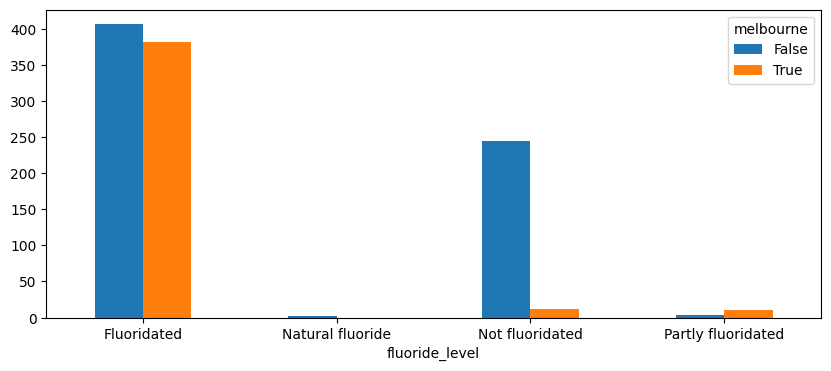

In [ ]:
Melbourne_Flouride = pd.crosstab(index=df['fluoride_level'],columns=df['melbourne'])
Melbourne_Flouride.plot.bar(figsize=(10,4),rot=0)

Yes I can see association between the column 'Melbourne' and 'Flouride_Level' because whenever the water is flouridated, the ratio of the column 'Melbourne' is high which is False or True and it means there are more than 350 places in melbourne where the water is flourided,likewise there are also places other than Melbourne where water is flourided indicating more than 400 places which is higher than Melbourne. Also We can see natural flourided water is being found more in other places rather than Melbourne. Also the ratio of Not flouridated water of other places is more than the places that are inside the Melbourne. But in the case of Partly flouridated water, it is seen that Melbourne has more Partly fluoridated water companies than the other places that are outside Melbourne.

In [ ]:
df.head()

,_id,cartodb_id,melbourne,postcode,id,fluoride_level,water_company,townsuburb,lat,lon
0,1,236,False,3227,236,Fluoridated,Barwon Water,CONNEWARRE,-38.264069,144.462309
1,2,1,True,3067,1,Fluoridated,City West Water,ABBOTSFORD,-37.803000,145.002000
2,3,2,True,3040,2,Fluoridated,City West Water,ABERFELDIE,-37.762000,144.901000
3,4,3,False,3352,3,Not fluoridated,Central Highlands Water,ADDINGTON,-37.383333,143.683333
4,5,4,False,3465,4,Fluoridated,Central Highlands Water,ADELAIDE LEAD,-37.083821,143.679125


**5. Print the number of water companies for different suburbs. Please report the pattern found in the result, if any.**


In [ ]:
subhurb_water_company = df.groupby('townsuburb')['water_company'].count().sort_values(ascending=False)

In [ ]:
print('Number of water companies for different suburbs: \n')
for name,count in subhurb_water_company.items():
  if count>1:
    print(f"{name}: {count} water companies")
  elif count<=1:
    print(f"{name}: {count} water company")

Number of water companies for different suburbs: 

BELGRAVE: 2 water companies
MULGRAVE: 2 water companies
HUNTINGDALE: 2 water companies
MELBOURNE: 2 water companies
COBURG: 2 water companies
ARMADALE: 2 water companies
OAKLEIGH: 2 water companies
HUGHESDALE: 2 water companies
TULLAMARINE: 2 water companies
UPWEY: 2 water companies
MALVERN: 2 water companies
PAKENHAM: 2 water companies
BAYSWATER: 2 water companies
NORTH SHORE: 1 water company
NORTH WARRANDYTE: 1 water company
NUMURKAH: 1 water company
NORTHCOTE: 1 water company
NOTTING HILL: 1 water company
NOWA NOWA: 1 water company
NULLAWIL: 1 water company
NORTH MELBOURNE: 1 water company
ABBOTSFORD: 1 water company
NUTFIELD: 1 water company
NUNAWADING: 1 water company
NORTH BENDIGO: 1 water company
NYAH: 1 water company
NYAH WEST: 1 water company
NYORA: 1 water company
OAK PARK: 1 water company
OAKLANDS JUNCTION: 1 water company
OAKLEIGH EAST: 1 water company
OAKLEIGH SOUTH: 1 water company
OCEAN GROVE: 1 water company
OFFICER: 1 

**From the above data points, I didn't notice any pattern among them other than the suburbs owning some number of water companies.**

**6. Continue from question 5, which suburb has the biggest number of water
companies?**

In [ ]:
subhurb_water_company_df = subhurb_water_company.to_frame(name='Number of water companies').reset_index().head(15)

In [ ]:
subhurb_water_company_df

,townsuburb,Number of water companies
0,BELGRAVE,2
1,MULGRAVE,2
2,HUNTINGDALE,2
3,MELBOURNE,2
4,COBURG,2
5,ARMADALE,2
6,OAKLEIGH,2
7,HUGHESDALE,2
8,TULLAMARINE,2
9,UPWEY,2


In [ ]:
import plotly.express as px

fig = px.bar(subhurb_water_company_df, x="townsuburb", y="Number of water companies", color="townsuburb", title="Subhurb Vs Water Companies")
fig.show()

From the above graph we can see that 13 subhurbs has the equal highest number of water companies that is 2 water company each. The name of those top 13 subhurbs are:-

1. BELGRAVE
2. MULGRAVE
3. HUNTINGDLE
4. MELBOURNE
5. COBURG
6. ARMADLE
7. OAKLEIGH
8. HUGHESDALE
9. TULLAMARINCE
10. UPWEY
11. MALVERN
12. PAKENHAM
13. BAYWATER

The other subhurbs has only 1 water company each.

In [ ]:
df.head(1)

,_id,cartodb_id,melbourne,postcode,id,fluoride_level,water_company,townsuburb,lat,lon
0,1,236,False,3227,236,Fluoridated,Barwon Water,CONNEWARRE,-38.264069,144.462309


**7. Continue from question 6, which suburb has the biggest number of fluoridated
companies?**

In [ ]:
df['Fluoridated'] = df['fluoride_level'] == 'Fluoridated'

In [ ]:
df.head()

,_id,cartodb_id,melbourne,postcode,id,fluoride_level,water_company,townsuburb,lat,lon,Fluoridated
0,1,236,False,3227,236,Fluoridated,Barwon Water,CONNEWARRE,-38.264069,144.462309,True
1,2,1,True,3067,1,Fluoridated,City West Water,ABBOTSFORD,-37.803000,145.002000,True
2,3,2,True,3040,2,Fluoridated,City West Water,ABERFELDIE,-37.762000,144.901000,True
3,4,3,False,3352,3,Not fluoridated,Central Highlands Water,ADDINGTON,-37.383333,143.683333,False
4,5,4,False,3465,4,Fluoridated,Central Highlands Water,ADELAIDE LEAD,-37.083821,143.679125,True


In [ ]:
subhurb_Flouridate_water_company = df.groupby(['townsuburb','Fluoridated'])['water_company'].count().sort_values(ascending=False)

In [ ]:
subhurb_Flouridate_water_company = subhurb_Flouridate_water_company.to_frame().reset_index()

In [ ]:
subhurb_Flouridate_water_company = subhurb_Flouridate_water_company[subhurb_Flouridate_water_company['Fluoridated'] == True].sort_values(by='water_company',ascending=False).head(14)

In [ ]:
import plotly.express as px

fig = px.bar(subhurb_Flouridate_water_company, x="townsuburb", y="water_company", color="townsuburb", title="Subhurb Vs Fluoridated Water Companies")
fig.show()

From the above graph we can see that 13 subhurbs has the equal highest number of water companies whose water is **Fluoridated**. The name of those top 13 subhurbs are:-

1. BELGRAVE
2. MULGRAVE
3. HUNTINGDLE
4. MELBOURNE
5. COBURG
6. ARMADLE
7. OAKLEIGH
8. HUGHESDALE
9. TULLAMARINCE
10. UPWEY
11. MALVERN
12. PAKENHAM
13. BAYWATER

The other subhurbs has only 1 water company each whose water water is Fluoridated.

In [ ]:
df.drop(columns='Fluoridated',inplace=True)

In [ ]:
df.head(2)

,_id,cartodb_id,melbourne,postcode,id,fluoride_level,water_company,townsuburb,lat,lon
0,1,236,False,3227,236,Fluoridated,Barwon Water,CONNEWARRE,-38.264069,144.462309
1,2,1,True,3067,1,Fluoridated,City West Water,ABBOTSFORD,-37.803000,145.002000


8. Create and print a data frame of the number of water companies at different
fluoride levels for different suburbs.

In [ ]:
flouride_towns = df.groupby(['fluoride_level','townsuburb'])['water_company'].count().sort_values(ascending=False)

In [ ]:
flouride_towns = flouride_towns.to_frame().reset_index()

In [ ]:
flouride_towns.shape

(1046, 3)

In [ ]:
print(flouride_towns)

          fluoride_level   townsuburb  water_company
0            Fluoridated  HUNTINGDALE              2
1            Fluoridated     PAKENHAM              2
2            Fluoridated   HUGHESDALE              2
3            Fluoridated       COBURG              2
4            Fluoridated      MALVERN              2
...                  ...          ...            ...
1041         Fluoridated  KEILOR PARK              1
1042         Fluoridated   KENNINGTON              1
1043         Fluoridated   KENSINGTON              1
1044         Fluoridated    KEON PARK              1
1045  Partly fluoridated    YELLINGBO              1

[1046 rows x 3 columns]


9. Continue from question 8. Draw a histogram of the top 10 suburbs against its
number of fluoridated companies. Explain the result.

In [ ]:
df['Fluoridated'] = df['fluoride_level'] == 'Fluoridated'

In [ ]:
subhurb_Flouridate_water_company = df.groupby(['townsuburb','Fluoridated'])['water_company'].count().sort_values(ascending=False)

In [ ]:
subhurb_Flouridate_water_company = subhurb_Flouridate_water_company.to_frame().reset_index()

In [ ]:
subhurb_Flouridate_water_company = subhurb_Flouridate_water_company[subhurb_Flouridate_water_company['Fluoridated'] == True].sort_values(by='water_company',ascending=False).head(10)

In [ ]:
import plotly.express as px

fig = px.bar(subhurb_Flouridate_water_company, x="townsuburb", y="water_company", color="townsuburb", title="Top 10 Fluoridated Water Companies")
fig.show()

In the above graph we can see the top 10 subhurbs having the highest number of Fluoridated water companies.The name of the top 10 subhurbs are:-

1.BELGRAVE

2.HUGHESDALE

3.BAYSWATER

4.PAKENHAM

5.MALVERN

6.UPWEY

7.TULLAMARINE

8.MULGRAVE

9.OAKLEIGH

10.COBURG

In the above list,we are coming into a conclusion that are subhurbs which are outside of Melbourn but have 2 Flouridated water companies and also topping the ranks in terms of it. Also,there are some subhurbs which are inside the Melbourne has the same number of Flouridated water companies.

In [ ]:
df.drop(columns='Fluoridated',inplace=True)

In [ ]:
df.shape

(1059, 10)

# **Clustering Of Water Companies**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _id             1059 non-null   int64  
 1   cartodb_id      1059 non-null   int64  
 2   melbourne       1059 non-null   bool   
 3   postcode        1059 non-null   int64  
 4   id              1059 non-null   int64  
 5   fluoride_level  1059 non-null   object 
 6   water_company   1059 non-null   object 
 7   townsuburb      1059 non-null   object 
 8   lat             1059 non-null   float64
 9   lon             1059 non-null   float64
dtypes: bool(1), float64(2), int64(4), object(3)
memory usage: 75.6+ KB


In [ ]:
df.head(5)

,_id,cartodb_id,melbourne,postcode,id,fluoride_level,water_company,townsuburb,lat,lon
0,1,236,False,3227,236,Fluoridated,Barwon Water,CONNEWARRE,-38.264069,144.462309
1,2,1,True,3067,1,Fluoridated,City West Water,ABBOTSFORD,-37.803000,145.002000
2,3,2,True,3040,2,Fluoridated,City West Water,ABERFELDIE,-37.762000,144.901000
3,4,3,False,3352,3,Not fluoridated,Central Highlands Water,ADDINGTON,-37.383333,143.683333
4,5,4,False,3465,4,Fluoridated,Central Highlands Water,ADELAIDE LEAD,-37.083821,143.679125


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for name,value in df.items():
  if df[name].dtype == 'object':
    df[name] = label_encoder.fit_transform(df[name])

In [ ]:
df.head(5)

,_id,cartodb_id,melbourne,postcode,id,fluoride_level,water_company,townsuburb,lat,lon
0,1,236,False,3227,236,0,0,231,-38.264069,144.462309
1,2,1,True,3067,1,0,2,0,-37.803000,145.002000
2,3,2,True,3040,2,0,2,1,-37.762000,144.901000
3,4,3,False,3352,3,2,1,2,-37.383333,143.683333
4,5,4,False,3465,4,0,1,3,-37.083821,143.679125


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(df)
df_scaled = scaler.transform(df)

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [ ]:
df_scaled.head()

,_id,cartodb_id,melbourne,postcode,id,fluoride_level,water_company,townsuburb,lat,lon
0,-1.730416,-0.961706,-0.783792,-0.659959,-0.961706,-0.582580,-1.323292,-0.964048,-0.896780,-0.348019
1,-1.727145,-1.730416,1.275849,-1.184314,-1.730416,-0.582580,-1.006062,-1.729012,-0.272652,0.106244
2,-1.723874,-1.727145,1.275849,-1.272799,-1.727145,-0.582580,-1.006062,-1.725701,-0.217153,0.021232
3,-1.720603,-1.723874,-0.783792,-0.250307,-1.723874,1.636673,-1.164677,-1.722389,0.295431,-1.003691
4,-1.717332,-1.720603,-0.783792,0.120019,-1.720603,-0.582580,-1.164677,-1.719078,0.700867,-1.007232


In [ ]:
y = df.iloc[:,6]

In [ ]:
y_column_name = ['water_company']

In [ ]:
y = pd.DataFrame(y, columns=y_column_name)

In [ ]:
y.head()

,water_company
0,0
1,2
2,2
3,1
4,1


In [ ]:
df_scaled.drop(columns='water_company',inplace=True)

In [ ]:
y = np.squeeze(y)

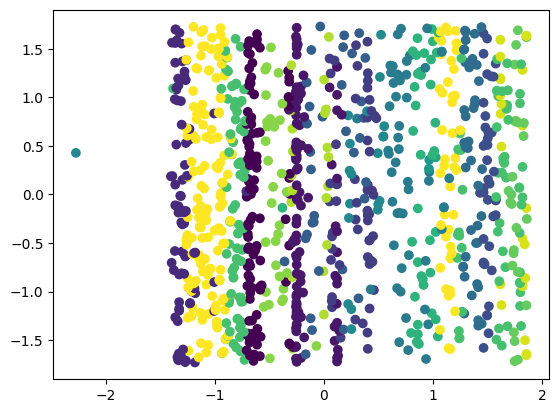

In [ ]:
plt.scatter(df_scaled.iloc[:,3],df_scaled.iloc[:,4],c=y)

In the above graph ,we can see the pattern of the data before computing clustering on it.

In [ ]:
new_df = df_scaled.iloc[:,3:5]

In [ ]:
new_df

,postcode,id
0,-0.659959,-0.961706
1,-1.184314,-1.730416
2,-1.272799,-1.727145
3,-0.250307,-1.723874
4,0.120019,-1.720603
...,...,...
1054,-0.250307,1.717332
1055,1.119571,1.720603
1056,1.444016,1.723874
1057,-1.197423,1.727145


In [ ]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_scores = []

for k in range(2, 25):
    kmeans = KMeans(n_clusters=k, random_state=42,n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, labels)
    silhouette_scores.append(silhouette_avg)

In [ ]:
silhouette_scores

[0.30034555214369685,
 0.2526821057375127,
 0.2736966651524116,
 0.2677443840471082,
 0.28616479444272225,
 0.3024641887939066,
 0.3138216935544455,
 0.320786833699824,
 0.31718333261518156,
 0.32850896373779137,
 0.32662296024237075,
 0.33533343013357025,
 0.3366872864809128,
 0.34445666591927077,
 0.3502560505609232,
 0.3604999368369339,
 0.36743403081390724,
 0.351780835814449,
 0.3445520668949184,
 0.35932155995273357,
 0.36487117005536907,
 0.36297131624367623,
 0.36241951493444324]

The best score of silhouette cofficient here is 0.3674 which is a very bad score of silhoute cofficient and it is considered that below 0.5 score means the algorithm didn't performed well in terms of clustering.

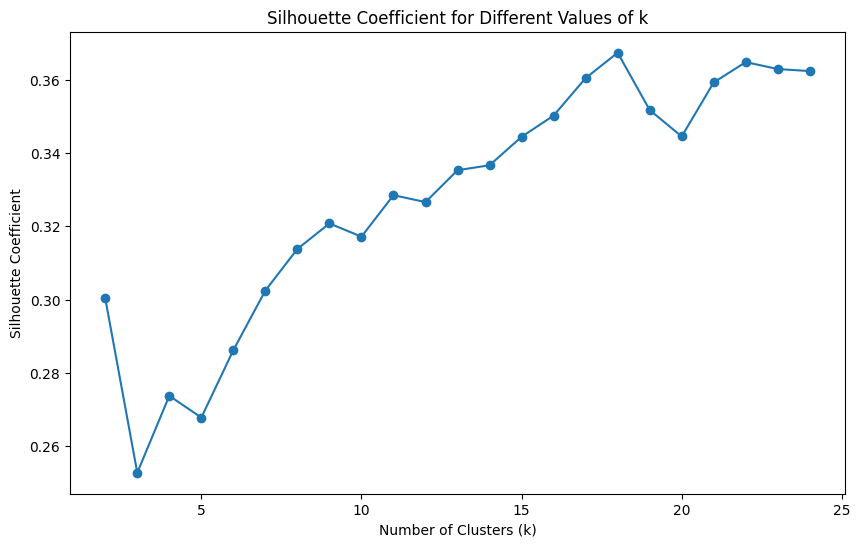

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 25), silhouette_scores, marker='o')
plt.title('Silhouette Coefficient for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [ ]:
print("The number of suburbs: ",len(df['townsuburb'].unique()))

The number of suburbs:  1046


In [ ]:
print("The number of water companies: ",len(df['water_company'].unique()))

The number of water companies:  18


**10. Based on the original dataset, use the available features and perform clustering
on all the water companies and determine the number of clusters. Is this the same
as the number of suburbs in the data set?**


In the above figure, I can see a peak at k = 18 and the silhouette score of that k is 0.3674,so the number of clusters will be 18 according to the best K and silhouette score. And No, the number of clusters isn't same as the number of suburbs in the dataset because there are 1046 suburbs and the number of clusters that has been determined is 18,rather the numbers of clusters is equal to the number of water companies present in the dataset which seems quite logical because we will be doing clustering based on the water companies.

**11. Continue from question 10, choose the best K and perform K-Means on the data set, report the purity score.**

From the above question 10, I found the best value of K is 18.

In [ ]:
kmeans = KMeans(n_clusters=18)
kmeans_labels = kmeans.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



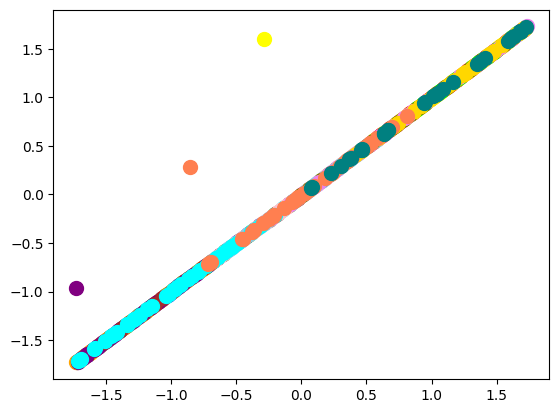

In [ ]:
plt.scatter(df_scaled.iloc[kmeans_labels==0, 0], df_scaled.iloc[kmeans_labels==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(df_scaled.iloc[kmeans_labels==1, 0], df_scaled.iloc[kmeans_labels==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(df_scaled.iloc[kmeans_labels==2, 0], df_scaled.iloc[kmeans_labels==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(df_scaled.iloc[kmeans_labels==3, 0], df_scaled.iloc[kmeans_labels==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(df_scaled.iloc[kmeans_labels==4, 0], df_scaled.iloc[kmeans_labels==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(df_scaled.iloc[kmeans_labels==5, 0], df_scaled.iloc[kmeans_labels==5, 1], s=100, c='yellow', label ='Cluster 6')
plt.scatter(df_scaled.iloc[kmeans_labels==6, 0], df_scaled.iloc[kmeans_labels==6, 1], s=100, c='orange', label ='Cluster 7')
plt.scatter(df_scaled.iloc[kmeans_labels==7, 0], df_scaled.iloc[kmeans_labels==7, 1], s=100, c='purple', label ='Cluster 8')
plt.scatter(df_scaled.iloc[kmeans_labels==8, 0], df_scaled.iloc[kmeans_labels==8, 1], s=100, c='brown', label ='Cluster 9')
plt.scatter(df_scaled.iloc[kmeans_labels==9, 0], df_scaled.iloc[kmeans_labels==9, 1], s=100, c='lime', label ='Cluster 10')
plt.scatter(df_scaled.iloc[kmeans_labels==10, 0], df_scaled.iloc[kmeans_labels==10, 1], s=100, c='pink', label ='Cluster 11')
plt.scatter(df_scaled.iloc[kmeans_labels==11, 0], df_scaled.iloc[kmeans_labels==11, 1], s=100, c='skyblue', label ='Cluster 12')
plt.scatter(df_scaled.iloc[kmeans_labels==12, 0], df_scaled.iloc[kmeans_labels==12, 1], s=100, c='olive', label ='Cluster 13')
plt.scatter(df_scaled.iloc[kmeans_labels==13, 0], df_scaled.iloc[kmeans_labels==13, 1], s=100, c='cyan', label ='Cluster 14')
plt.scatter(df_scaled.iloc[kmeans_labels==14, 0], df_scaled.iloc[kmeans_labels==14, 1], s=100, c='violet', label ='Cluster 15')
plt.scatter(df_scaled.iloc[kmeans_labels==15, 0], df_scaled.iloc[kmeans_labels==15, 1], s=100, c='gold', label ='Cluster 16')
plt.scatter(df_scaled.iloc[kmeans_labels==16, 0], df_scaled.iloc[kmeans_labels==16, 1], s=100, c='coral', label ='Cluster 17')
plt.scatter(df_scaled.iloc[kmeans_labels==17, 0], df_scaled.iloc[kmeans_labels==17, 1], s=100, c='teal', label ='Cluster 18')

The above figure shows how the data has been clustered by Kmeans

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

def purity_score(y_true, y_pred):

    confusion_mat = confusion_matrix(y, kmeans_labels)

    return np.sum(np.max(confusion_mat, axis=0)) / np.sum(confusion_mat)


purity_k_means_labels = purity_score(y, kmeans_labels)
print("The Purity Score is:", purity_k_means_labels*100,"%")

The Purity Score is: 42.492917847025495 %


**12. Continue from question 11, perform K-Means++ on the data set, report the purity score and explain whether the K-Means++ returns better/worse result than that of K-Means**

In [ ]:
kmeans = KMeans(n_clusters=2,init='k-means++',n_init=10)
k_plus_labels = kmeans.fit_predict(df_scaled)

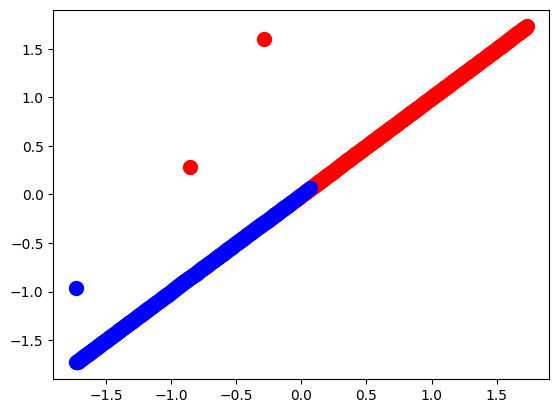

In [ ]:
plt.scatter(df_scaled.iloc[k_plus_labels==0, 0], df_scaled.iloc[k_plus_labels==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(df_scaled.iloc[k_plus_labels==1, 0], df_scaled.iloc[k_plus_labels==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(df_scaled.iloc[k_plus_labels==2, 0], df_scaled.iloc[k_plus_labels==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(df_scaled.iloc[k_plus_labels==3, 0], df_scaled.iloc[k_plus_labels==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(df_scaled.iloc[k_plus_labels==4, 0], df_scaled.iloc[k_plus_labels==4, 1], s=100, c='magenta', label ='Cluster 5')
plt.scatter(df_scaled.iloc[k_plus_labels==5, 0], df_scaled.iloc[k_plus_labels==5, 1], s=100, c='yellow', label ='Cluster 6')
plt.scatter(df_scaled.iloc[k_plus_labels==6, 0], df_scaled.iloc[k_plus_labels==6, 1], s=100, c='orange', label ='Cluster 7')
plt.scatter(df_scaled.iloc[k_plus_labels==7, 0], df_scaled.iloc[k_plus_labels==7, 1], s=100, c='purple', label ='Cluster 8')
plt.scatter(df_scaled.iloc[k_plus_labels==8, 0], df_scaled.iloc[k_plus_labels==8, 1], s=100, c='brown', label ='Cluster 9')
plt.scatter(df_scaled.iloc[k_plus_labels==9, 0], df_scaled.iloc[k_plus_labels==9, 1], s=100, c='lime', label ='Cluster 10')
plt.scatter(df_scaled.iloc[k_plus_labels==10, 0], df_scaled.iloc[k_plus_labels==10, 1], s=100, c='pink', label ='Cluster 11')
plt.scatter(df_scaled.iloc[k_plus_labels==11, 0], df_scaled.iloc[k_plus_labels==11, 1], s=100, c='skyblue', label ='Cluster 12')
plt.scatter(df_scaled.iloc[k_plus_labels==12, 0], df_scaled.iloc[k_plus_labels==12, 1], s=100, c='olive', label ='Cluster 13')
plt.scatter(df_scaled.iloc[k_plus_labels==13, 0], df_scaled.iloc[k_plus_labels==13, 1], s=100, c='cyan', label ='Cluster 14')
plt.scatter(df_scaled.iloc[k_plus_labels==14, 0], df_scaled.iloc[k_plus_labels==14, 1], s=100, c='violet', label ='Cluster 15')
plt.scatter(df_scaled.iloc[k_plus_labels==15, 0], df_scaled.iloc[k_plus_labels==15, 1], s=100, c='gold', label ='Cluster 16')
plt.scatter(df_scaled.iloc[k_plus_labels==16, 0], df_scaled.iloc[k_plus_labels==16, 1], s=100, c='coral', label ='Cluster 17')
plt.scatter(df_scaled.iloc[k_plus_labels==17, 0], df_scaled.iloc[k_plus_labels==17, 1], s=100, c='teal', label ='Cluster 18')

The above figure shows how the data has been clustered by Kmeans++.

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

def purity_score(y_true, y_pred):

    confusion_mat = confusion_matrix(y, k_plus_labels)

    return np.sum(np.max(confusion_mat, axis=0)) / np.sum(confusion_mat)


purity_k_plus_labels = purity_score(y, k_plus_labels)
print("The Purity Score is:", purity_k_plus_labels*100,"%")

The Purity Score is: 19.35788479697828 %


(0.0, 1.0)

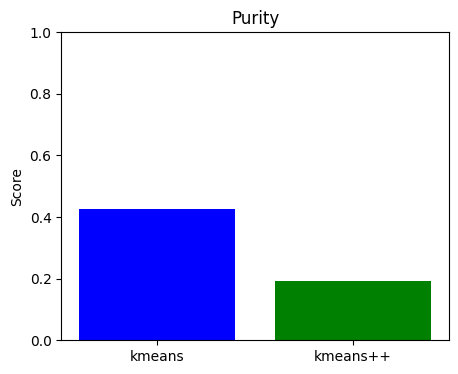

In [ ]:
purity_scores = [purity_k_means_labels, purity_k_plus_labels]

labels = ['kmeans','kmeans++']

plt.figure(figsize=(5, 4))

# Purity Scores
plt.bar(labels, purity_scores, color=['blue', 'green'])
plt.title('Purity')
plt.ylabel('Score')
plt.ylim(0, 1)

Based on the above figure, K means is giving much better results than kmeans++ in terms of purity score where K means has the purity score of 42.49% and Kmeans++ having the purity score of only 19.3578%. So in conclusion,we can say that Kmeans is performing much better than Kmeans++ in clustering the data points of the given dataset.

13. Apart from K-Means and K-Means++, try another clustering method, and compare the results.

# **Hierarchical Clustering**

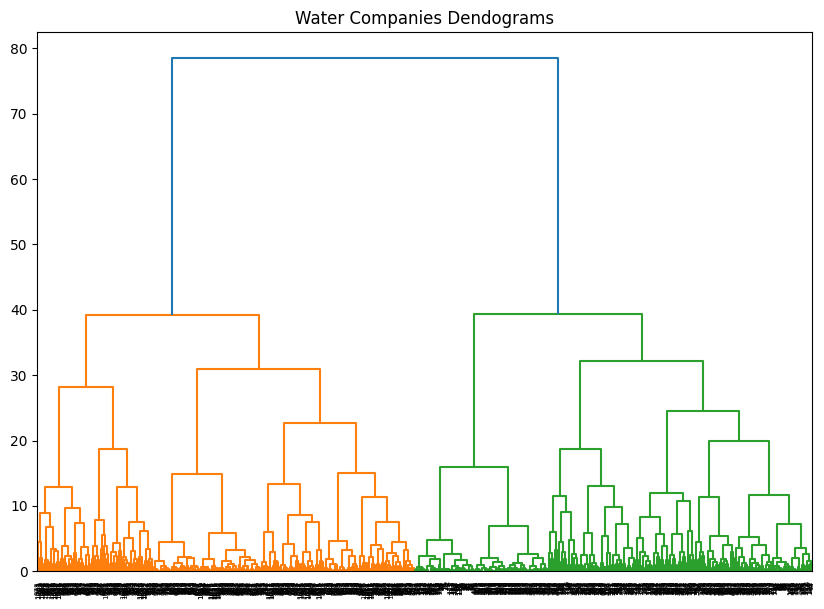

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Water Companies Dendograms")
dend = shc.dendrogram(shc.linkage(df_scaled, method='ward'))

From the above figure of dendogram,I can say that there will be only 2 clusters because the longest vertical Line is the first line that I  can cut the middle of it by vertical line which determines the number of clusters.

In [ ]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
Hierarchical_labels=cluster.fit_predict(df_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



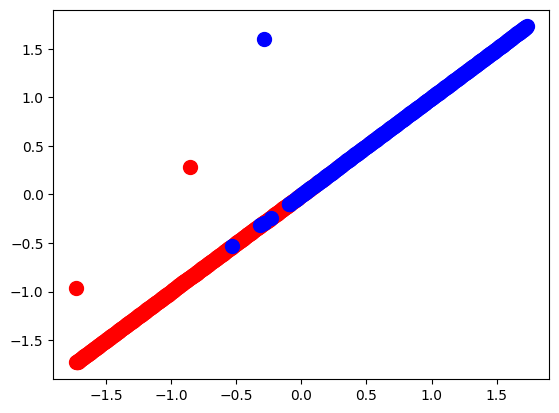

In [ ]:
plt.scatter(df_scaled.iloc[Hierarchical_labels==0, 0], df_scaled.iloc[Hierarchical_labels==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(df_scaled.iloc[Hierarchical_labels==1, 0], df_scaled.iloc[Hierarchical_labels==1, 1], s=100, c='blue', label ='Cluster 2')

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

def purity_score(y_true, y_pred):

    confusion_mat = confusion_matrix(y, Hierarchical_labels)

    return np.sum(np.max(confusion_mat, axis=0)) / np.sum(confusion_mat)


purity_Hierarchical_labels = purity_score(y, Hierarchical_labels)
print("The Purity Score is:", purity_Hierarchical_labels*100,"%")

The Purity Score is: 19.35788479697828 %


Based on the purity score, Kmeans++ and Hierarchical clustering performed the same in determining the clusters of the dataset,whereas Kmeans were much better than the two other algorithmns. The purity score of all the 3 clustering algorithms are given below:-

1.Kmeans - 42.4929%

2.Kmeans++ - 19.35%

3.Hierarchical Clustering - 19.35%